In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("creditcard.csv")
data=data.drop_duplicates(subset=None,keep='first',inplace=False)

In [3]:
x = data.drop("Class",axis = 1)
y = data["Class"]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc= StandardScaler()

In [8]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()
treemodel.fit(x_train, y_train)
y_pred = treemodel.predict(x_test)

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

In [11]:
accuracy_score(y_test,y_pred)

0.9992011090486148

In [12]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[84960    29]
 [   39    90]]


In [13]:
classification_report= classification_report(y_test,y_pred)

In [14]:
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.76      0.70      0.73       129

    accuracy                           1.00     85118
   macro avg       0.88      0.85      0.86     85118
weighted avg       1.00      1.00      1.00     85118



In [15]:
from sklearn.metrics import roc_curve

In [16]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

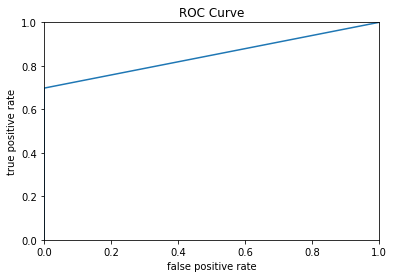

0.8486665989880496

In [17]:
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr,tpr,marker= " ")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC Curve")
plt.show()
ROC_score =  roc_auc_score(y_test,y_pred)
ROC_score


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=16,
                                       n_estimators=100, oob_score=True)

In [20]:
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, n_jobs=-1, oob_score=True, random_state=42)

In [21]:
y_pred = classifier_rf.predict(x_test)

In [22]:
accuracy_score(y_test,y_pred)

0.9995770577316196

In [23]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[84984     5]
 [   31    98]]


In [24]:
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.76      0.70      0.73       129

    accuracy                           1.00     85118
   macro avg       0.88      0.85      0.86     85118
weighted avg       1.00      1.00      1.00     85118



In [25]:
from sklearn.metrics import roc_curve

In [26]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

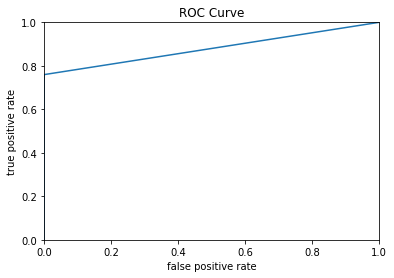

0.8798155456688832

In [27]:
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr,tpr,marker= " ")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC Curve")
plt.show()
ROC_score =  roc_auc_score(y_test,y_pred)
ROC_score
